In [3]:
import numpy as np
import math
import random
import matplotlib.pyplot as mplot
from scipy.io import arff
import sklearn

In [2]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#000000']

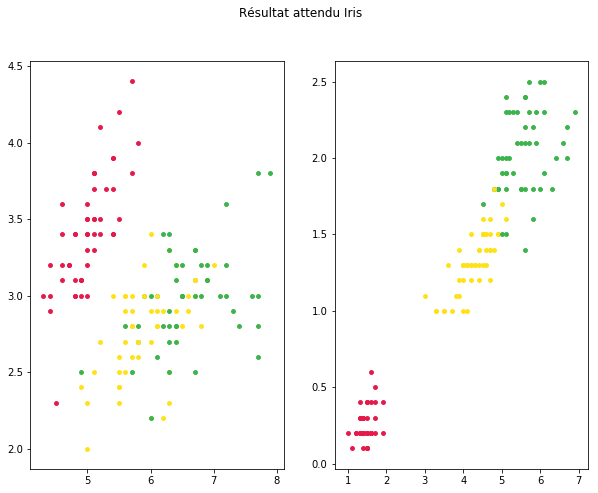

In [163]:
# Extracting the raw data
# 1261 values for 2d-4c.arff

# raw_data = arff.loadarff(open('donnees/2d-4c.arff','r'))
raw_data = arff.loadarff(open('donnees/iris.arff','r'))
# raw_data = arff.loadarff(open('donnees/2d-3c-no123.arff','r'))
# raw_data = arff.loadarff(open('donnees/banana.arff','r'))

# Taking only the array with values
cluster_data = raw_data[0]
# Getting rid of the cluster number
data = []
for i in cluster_data:
    data.append([i[0], i[1], i[2], i[3]])


data_revealed = []
cluster_names = []
for i in cluster_data:
    cluster_nb = -1
    if not(i[4] in cluster_names):
        cluster_names.append(i[4])
    for index, nm in enumerate(cluster_names):
        if (i[4] == nm):
            cluster_nb = index
    data_revealed.append([i[0], i[1], i[2], i[3], cluster_nb])
# print(data_revealed)

# Plotting the initial situation
fig, (graph1, graph2) = mplot.subplots(1,2,figsize=[10,7.5])
fig.suptitle("Résultat attendu Iris")
for el in data_revealed:
    graph1.scatter(el[0], el[1], c=colors[el[4]], s=15)
for el in data_revealed:
    graph2.scatter(el[2], el[3], c=colors[el[4]], s=15)
mplot.show()

In [3]:
import csv

data = []
with open('dataset/x4.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        data.append([float(row[0]), float(row[1])])
        
    print(len(data))
    
#     mplot.figure(figsize=[12,9])
#     mplot.title("x4")
#     for el in data:
#         mplot.scatter(el[0], el[1], c='#133f84')
#     mplot.show()

5000


0.4798


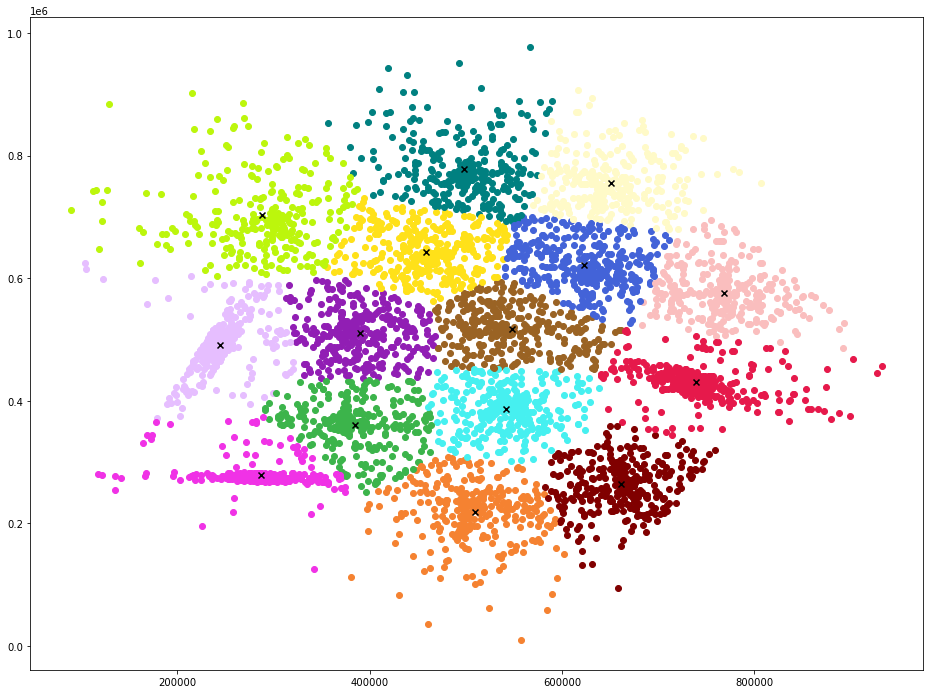

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Define some variables
values = np.array(data)
nb_clusters = 15

# We find the centers of the clusters
kmeans = KMeans(nb_clusters, init="k-means++", max_iter=100, tol=1e-5).fit(values)
score = float("{:.4f}".format(metrics.silhouette_score(values, kmeans.labels_, metric='euclidean')))

print(score)

mplot.figure(figsize=[16,12])
for index, cluster in enumerate(kmeans.labels_):
    color = colors[cluster]
    mplot.scatter(values[index, 0], values[index, 1], c=color)
for center in kmeans.cluster_centers_:
    mplot.scatter(center[0], center[1], c='#000000', marker='x')


Scores [nb of clusters, score]: [[2, 0.6808], [3, 0.5526], [4, 0.4972], [5, 0.4885], [6, 0.3682], [7, 0.3509], [8, 0.3608], [9, 0.3467], [10, 0.3159], [11, 0.3083], [12, 0.2992], [13, 0.3125], [14, 0.2838], [15, 0.3049], [16, 0.2997], [17, 0.2805]]
The best result is obtained with 2 clusters: 0.6808
Program execution time (in seconds): 0.7822442054748535


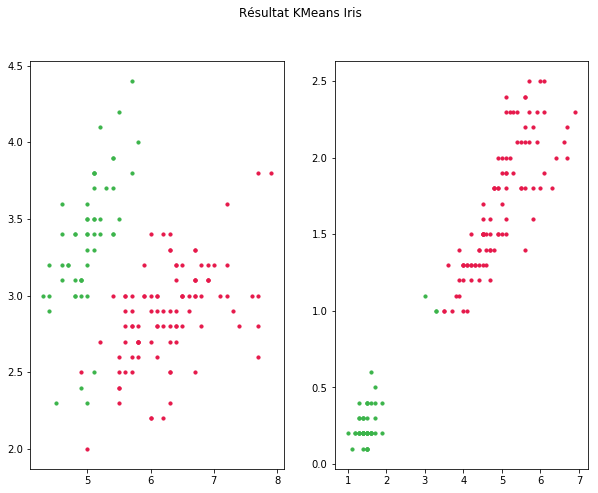

In [182]:
from sklearn import metrics
import time
# Plusieurs métriques utiles
# Coefficient de silhouette / Indice de Davies Bouldin
# On utilise le coefficient de silhouette d'abord

start_time = time.time()
scores = []
values = np.array(data)

for i in range(2,18):
    kmeans = KMeans(i, init="k-means++", max_iter=100, tol=1e-5).fit(values)
    score = float("{:.4f}".format(metrics.silhouette_score(values, kmeans.labels_, metric='euclidean')))
    scores.append([i, score])
    

max_score = -1
max_index = -1
for result in scores:
    if (result[1] > max_score):
        max_score = result[1]
        max_index = result[0]

end_time = time.time()

print("Scores [nb of clusters, score]: " + str(scores))
print("The best result is obtained with " + str(max_index) + " clusters: " + str(max_score))
print("Program execution time (in seconds): " + str(end_time - start_time))

kmeans = KMeans(max_index, init="k-means++", max_iter=100, tol=1e-5).fit(values)
mplot.figure(figsize=[12,9])
# for index, cluster in enumerate(kmeans.labels_):
#     color = colors[cluster]
#     mplot.scatter(values[index, 0], values[index, 1], c=color)
# for center in kmeans.cluster_centers_:
#     mplot.scatter(center[0], center[1], c='#000000', marker='x')
# mplot.show()
fig, (graph1, graph2) = mplot.subplots(1,2, figsize=[10,7.5])
fig.suptitle("Résultat KMeans Iris")
fig.figsize = [12,9]
for index, cluster in enumerate(kmeans.labels_):
    color = colors[cluster]
    graph1.scatter(values[index,0], values[index,1], c=color, s=10)
for index, cluster in enumerate(kmeans.labels_):
    color = colors[cluster]
    graph2.scatter(values[index,2], values[index,3], c=color, s=10)


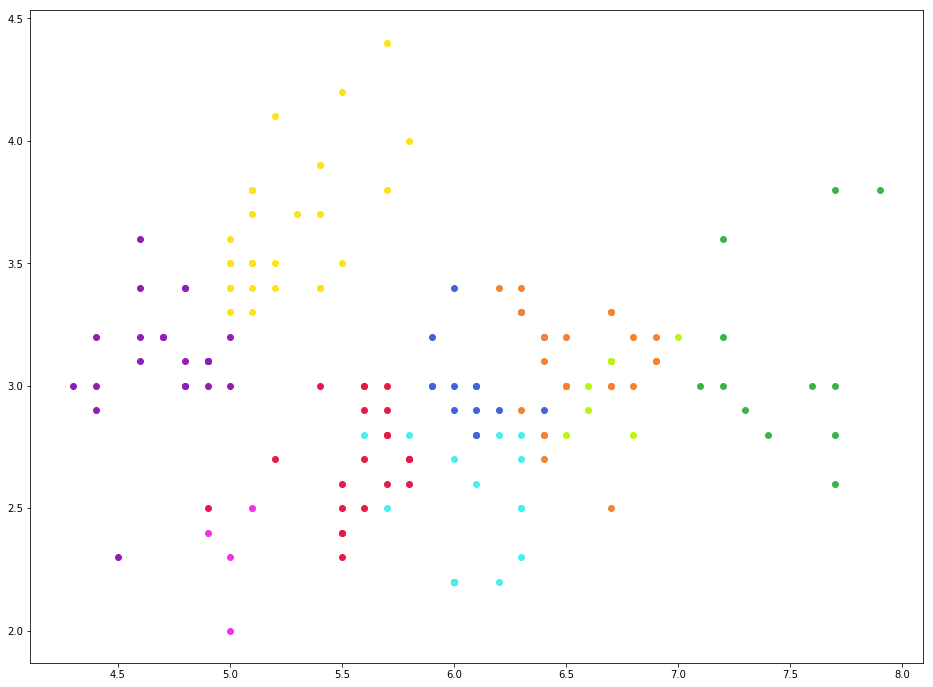

In [15]:
from sklearn.cluster import AgglomerativeClustering

values = np.array(data)

# We find the centers of the clusters
agglomerative = AgglomerativeClustering(n_clusters=9).fit(values)

mplot.figure(figsize=[16,12])
for index, cluster in enumerate(agglomerative.labels_):
    color = colors[cluster]
    mplot.scatter(values[index, 0], values[index, 1], c=color)

Scores [nb of clusters, score]: [[2, 0.6864], [3, 0.5541], [4, 0.4887], [5, 0.4842], [6, 0.3619], [7, 0.3449], [8, 0.3462], [9, 0.3331], [10, 0.3292], [11, 0.3121], [12, 0.2937], [13, 0.2778], [14, 0.2851], [15, 0.293], [16, 0.2975], [17, 0.3038]]
The best result is obtained with 2 clusters: 0.6864
Program execution time (in seconds): 0.045877695083618164


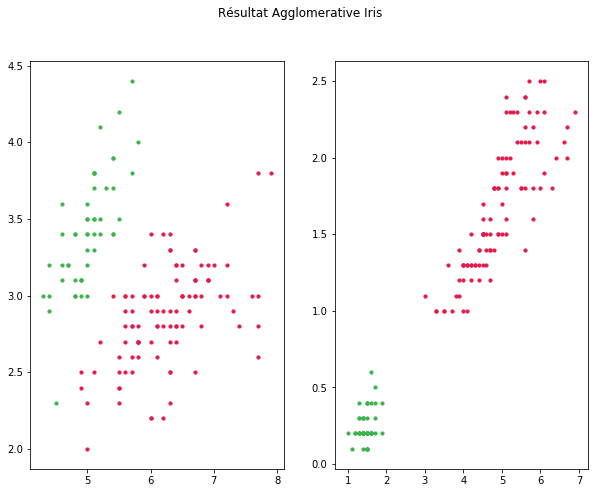

In [214]:
from sklearn import metrics
# Plusieurs métriques utiles
# Coefficient de silhouette / Indice de Davies Bouldin
# On utilise le coefficient de silhouette d'abord

start_time = time.time()
scores = []
values = np.array(data)

for i in range(2,18):
    agglomerative = AgglomerativeClustering(n_clusters=i).fit(values)
    score = float("{:.4f}".format(metrics.silhouette_score(values, agglomerative.labels_, metric='euclidean')))
    scores.append([i, score])
    

max_score = -1
max_index = -1
for result in scores:
    if (result[1] > max_score):
        max_score = result[1]
        max_index = result[0]
        
end_time = time.time()

print("Scores [nb of clusters, score]: " + str(scores))
print("The best result is obtained with " + str(max_index) + " clusters: " + str(max_score))
print("Program execution time (in seconds): " + str(end_time - start_time))

agglomerative = AgglomerativeClustering(n_clusters=max_index).fit(values)
# mplot.figure(figsize=[12,9])
# for index, cluster in enumerate(kmeans.labels_):
#     color = colors[cluster]
#     mplot.scatter(values[index, 0], values[index, 1], c=color)
# mplot.show()

fig, (graph1, graph2) = mplot.subplots(1,2, figsize=[10,7.5])
fig.suptitle("Résultat Agglomerative Iris")
fig.figsize = [12,9]
for index, cluster in enumerate(agglomerative.labels_):
    color = colors[cluster]
    graph1.scatter(values[index,0], values[index,1], c=color, s=10)
for index, cluster in enumerate(agglomerative.labels_):
    color = colors[cluster]
    graph2.scatter(values[index,2], values[index,3], c=color, s=10)

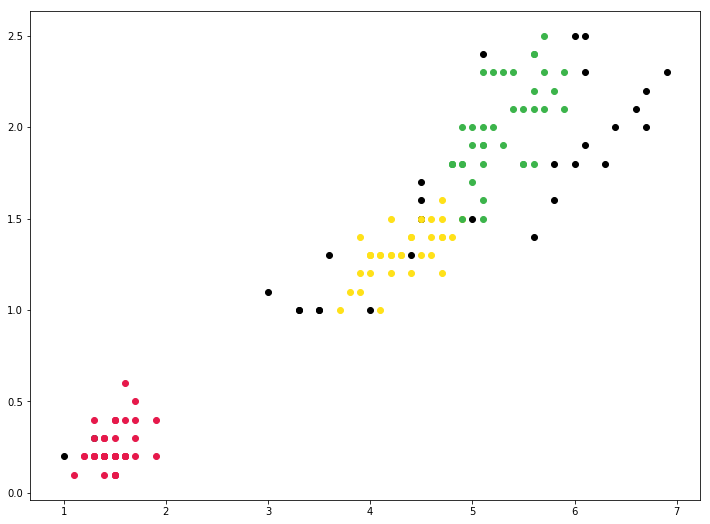

In [206]:
from sklearn.cluster import DBSCAN

values = np.array(data)

db = DBSCAN(eps=0.415, min_samples=5).fit(values)

mplot.figure(figsize=[12,9])
for index, cluster in enumerate(db.labels_):
    color = colors[cluster]
    mplot.scatter(values[index, 2], values[index, 3], c=color)
mplot.show()

In [68]:
def nb_diff_values(x):
    values = []
    nb_values = 0
    for i in x:
        if not(i in values):
            values.append(i)
            nb_values += 1
    return nb_values

# print(nb_diff_values([1,1,1,1,1,1])) #1
# print(nb_diff_values([1,2,3,4,5,6])) #6
# print(nb_diff_values([1,2,1,2,1,2])) #2
# print(nb_diff_values([1,2,3,4,5,1])) #5

[[-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864], [-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864], [-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864], [-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864], [-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864], [-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864], [-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864], [-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864], [-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864], [-1, -1, 0.2335, 0.1959, 0.3659, 0.5435, 0.5384, 0.5336, 0.522, 0.6864]]
The best result is obtained with (min_sample=2, eps=1.0): 0.6864
Program execution time (in seconds): 0.27947187423706055


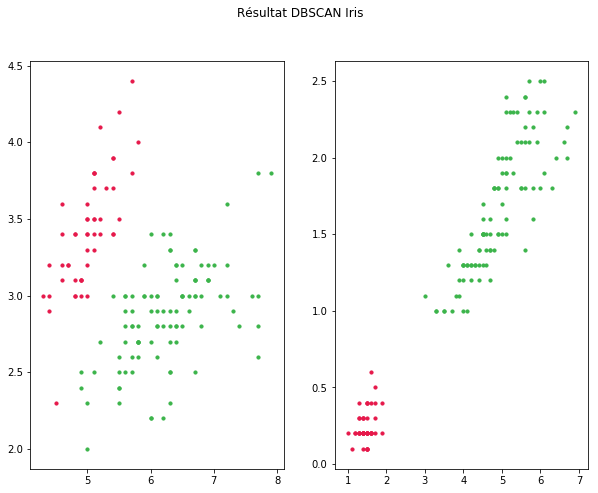

In [227]:
from sklearn import metrics
# Plusieurs métriques utiles
# Coefficient de silhouette / Indice de Davies Bouldin
# On utilise le coefficient de silhouette d'abord

start_time = time.time()
scores = [[None] * 10] * 10

values = np.array(data)
# For xi: [eps from 6000 to 30000 (step: 3000); min_samples from 20 to 110 (step: 10)]
# For Iris: [eps from 0.1 to 1 (step: 0.1); min_samples from 2 to 11 (step: 1)]
for i_min_samples in range(1,11):
    for i_eps in range(1,11):
        db = DBSCAN(eps=(i_eps*0.1), min_samples=(i_min_samples+1)).fit(values)
        
        if (nb_diff_values(db.labels_) > 1):
            score = float("{:.4f}".format(metrics.silhouette_score(values, db.labels_, metric='euclidean')))
        else:
            score = -1
        scores[i_min_samples-1][i_eps-1] = score

max_score = -1
max_index = -1
for i_line, score_line in enumerate(scores):
    for i_score, score in enumerate(score_line):
        if (score > max_score):
            max_score = score
            max_index = (i_line+1, i_score+1)

print(scores)
correct_min_samples = max_index[0] + 1
correct_eps = max_index[1] * 0.1

end_time = time.time()

# for i in range(1,11):
#     for j in range(1,11):
#         print("Score (min_sample=" + str(i*10+50) + ", eps=" + str(j*10000) + "): " + str(scores[i-1][j-1]))
        
print("The best result is obtained with (min_sample=" + str(correct_min_samples) + ", eps=" + str(correct_eps) + "): " 
      + str(scores[max_index[0]-1][max_index[1]-1]))
print("Program execution time (in seconds): " + str(end_time - start_time))

db = DBSCAN(eps=correct_eps, min_samples=correct_min_samples).fit(values)

# mplot.figure(figsize=[12,9])
# for index, cluster in enumerate(db.labels_):
#     color = colors[cluster]
#     mplot.scatter(values[index, 0], values[index, 1], c=color)
# mplot.show()

fig, (graph1, graph2) = mplot.subplots(1,2, figsize=[10,7.5])
fig.suptitle("Résultat DBSCAN Iris")
fig.figsize = [12,9]
for index, cluster in enumerate(db.labels_):
    color = colors[cluster]
    graph1.scatter(values[index,0], values[index,1], c=color, s=10)
for index, cluster in enumerate(db.labels_):
    color = colors[cluster]
    graph2.scatter(values[index,2], values[index,3], c=color, s=10)

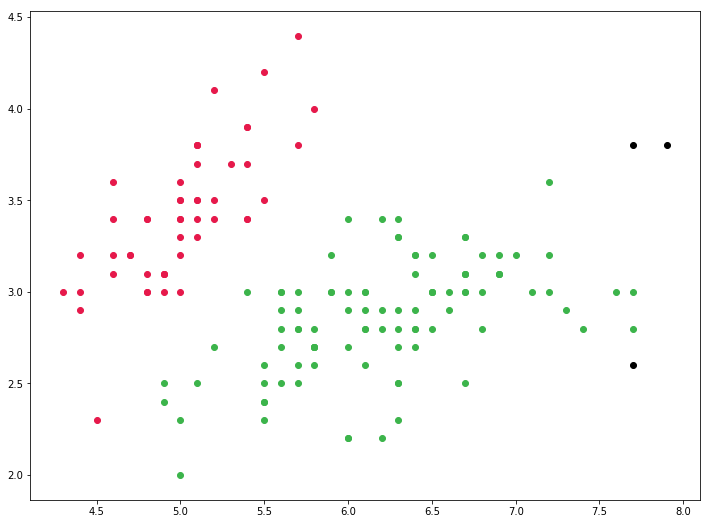

In [223]:
from hdbscan import HDBSCAN

values = np.array(data)

hdb = HDBSCAN(min_cluster_size=20).fit(values)
# hdb = HDBSCAN(cluster_selection_epsilon=10000, min_samples=60).fit(values)

mplot.figure(figsize=[12,9])
for index, cluster in enumerate(hdb.labels_):
    color = colors[cluster]
    mplot.scatter(values[index, 0], values[index, 1], c=color)
mplot.show()

The best result is obtained with (min_cluster_size=3): 0.6864
Program execution time (in seconds): 0.058354854583740234


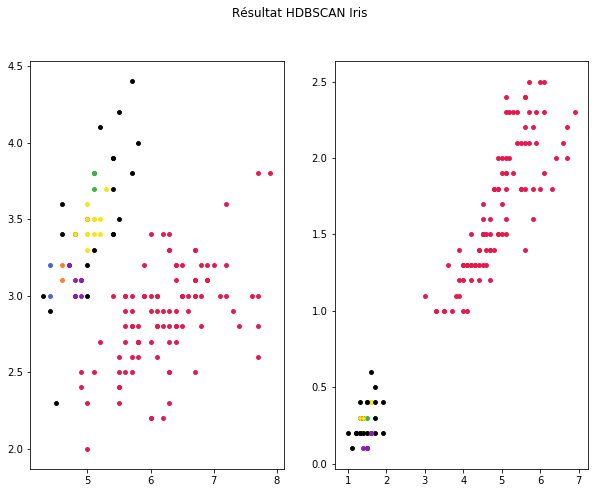

In [230]:
from sklearn import metrics
# Plusieurs métriques utiles
# Coefficient de silhouette / Indice de Davies Bouldin
# On utilise le coefficient de silhouette d'abord

start_time = time.time()
scores = [None] * 10

values = np.array(data)

# For x1: [eps from 10000 to 100000 (step: 10000); min_samples from 20 to 110 (step: 10)]
# For x2: [eps from 10000 to 100000 (step: 10000); min_samples from 20 to 110 (step: 10)]
for i_min_cs in range(1,11):
    hdb = HDBSCAN(min_cluster_size=(i_min_cs+1)).fit(values)

    if (nb_diff_values(hdb.labels_) > 1):
        score = float("{:.4f}".format(metrics.silhouette_score(values, hdb.labels_, metric='euclidean')))
    else:
        score = -1
    scores[i_min_cs-1] = score
        
# print(scores)

max_score = -1
max_index = -1
for i, score in enumerate(scores):
    if (score > max_score):
        max_score = score
        max_index = i + 1
            
correct_min_cs = max_index + 1

end_time = time.time()

# for i in range(1,11):
#     for j in range(1,11):
#         print("Score (min_sample=" + str(i*10+50) + ", eps=" + str(j*10000) + "): " + str(scores[i-1][j-1]))
        
print("The best result is obtained with (min_cluster_size=" + str(correct_min_cs) + "): " 
      + str(scores[max_index-1]))

hdb = HDBSCAN(min_cluster_size=(i_min_cs+1)).fit(values)
hdb = HDBSCAN(min_cluster_size=(2)).fit(values)
# mplot.figure(figsize=[12,9])
# for index, cluster in enumerate(hdb.labels_):
#     color = colors[cluster]
#     mplot.scatter(values[index, 0], values[index, 1], c=color)
# mplot.show()

fig, (graph1, graph2) = mplot.subplots(1,2, figsize=[10,7.5])
fig.suptitle("Résultat HDBSCAN Iris")
fig.figsize = [10,7.5]
for index, cluster in enumerate(hdb.labels_):
    color = colors[cluster]
    graph1.scatter(values[index,0], values[index,1], c=color, s=15)
for index, cluster in enumerate(hdb.labels_):
    color = colors[cluster]
    graph2.scatter(values[index,2], values[index,3], c=color, s=15)

print("Program execution time (in seconds): " + str(end_time - start_time))